In [4]:
# Dependencies and Setup
import csv
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress 
import seaborn as sns 
from scipy import stats
import scipy.stats as sts


# Analysis 


* Zillow Observed Rent Index (ZORI): A smoothed measure of the typical observed market rate rent across a given region. ZORI is a repeat-rent index that is weighted to the rental housing stock to ensure representativeness across the entire market, not just those homes currently listed for-rent. The index is dollar-denominated by computing the mean of listed rents that fall into the 40th to 60th percentile range for all homes and apartments in a given region, which is once again weighted to reflect the rental housing stock.

In [5]:
# Extracting the path
home_rental_path = "../Data/Housing_Price/Median_List_Price_monthly.csv"

In [6]:
# Read Real Estate Data from Zillow (from year 2015 to 2020)
# real_estate_data = pd.read_csv(real_estate_path)
home_rental_data = pd.read_csv(home_rental_path)
home_rental_data

# original dataframe has 914 rows × 75 columns

,RegionID,RegionName,StateName,SizeRank,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,...,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01
0,102001,United States,NaN,0,1458,1464,1469,1475,1481,1487,...,1744,1745,1745,1746,1746,1747,1747,1747,1747.0,1748.0
1,394913,"New York, NY",NY,1,2518,2527,2537,2546,2555,2564,...,2756,2734,2713,2691,2669,2646,2624,2600,2576.0,2552.0
2,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,2,2024,2036,2047,2059,2071,2083,...,2566,2565,2564,2563,2561,2559,2558,2556,2554.0,2553.0
3,394463,"Chicago, IL",IL,3,1573,1577,1581,1584,1589,1593,...,1766,1762,1758,1754,1750,1746,1742,1737,1732.0,1728.0
4,394514,"Dallas-Fort Worth, TX",TX,4,1285,1291,1297,1303,1308,1313,...,1566,1568,1571,1573,1575,1577,1580,1582,1585.0,1587.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,394995,"Port St. Lucie, FL",FL,119,1286,1292,1297,1303,1308,1314,...,1721,1732,1742,1753,1763,1773,1784,1794,1804.0,1815.0
102,394602,"Fort Collins, CO",CO,159,1342,1350,1359,1367,1374,1381,...,1588,1592,1595,1598,1601,1604,1608,1611,1614.0,1618.0
103,394405,"Boulder, CO",CO,162,1647,1658,1670,1681,1693,1704,...,1991,1994,1997,2000,2003,2007,2010,2013,2017.0,2020.0
104,394645,"Greeley, CO",CO,177,1314,1323,1333,1342,1349,1356,...,1643,1647,1651,1656,1660,1664,1668,1673,1677.0,1681.0


In [7]:
# split city from state, make a new column with just city
home_rental_data["RegionName"] = home_rental_data["RegionName"].str.split(",").str[0]
home_rental_data

,RegionID,RegionName,StateName,SizeRank,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,...,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01
0,102001,United States,NaN,0,1458,1464,1469,1475,1481,1487,...,1744,1745,1745,1746,1746,1747,1747,1747,1747.0,1748.0
1,394913,New York,NY,1,2518,2527,2537,2546,2555,2564,...,2756,2734,2713,2691,2669,2646,2624,2600,2576.0,2552.0
2,753899,Los Angeles-Long Beach-Anaheim,CA,2,2024,2036,2047,2059,2071,2083,...,2566,2565,2564,2563,2561,2559,2558,2556,2554.0,2553.0
3,394463,Chicago,IL,3,1573,1577,1581,1584,1589,1593,...,1766,1762,1758,1754,1750,1746,1742,1737,1732.0,1728.0
4,394514,Dallas-Fort Worth,TX,4,1285,1291,1297,1303,1308,1313,...,1566,1568,1571,1573,1575,1577,1580,1582,1585.0,1587.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,394995,Port St. Lucie,FL,119,1286,1292,1297,1303,1308,1314,...,1721,1732,1742,1753,1763,1773,1784,1794,1804.0,1815.0
102,394602,Fort Collins,CO,159,1342,1350,1359,1367,1374,1381,...,1588,1592,1595,1598,1601,1604,1608,1611,1614.0,1618.0
103,394405,Boulder,CO,162,1647,1658,1670,1681,1693,1704,...,1991,1994,1997,2000,2003,2007,2010,2013,2017.0,2020.0
104,394645,Greeley,CO,177,1314,1323,1333,1342,1349,1356,...,1643,1647,1651,1656,1660,1664,1668,1673,1677.0,1681.0


In [8]:
home_rental_data = home_rental_data.dropna(how="any")
home_rental_data.head()

,RegionID,RegionName,StateName,SizeRank,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,...,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01
1,394913,New York,NY,1,2518,2527,2537,2546,2555,2564,...,2756,2734,2713,2691,2669,2646,2624,2600,2576.0,2552.0
2,753899,Los Angeles-Long Beach-Anaheim,CA,2,2024,2036,2047,2059,2071,2083,...,2566,2565,2564,2563,2561,2559,2558,2556,2554.0,2553.0
3,394463,Chicago,IL,3,1573,1577,1581,1584,1589,1593,...,1766,1762,1758,1754,1750,1746,1742,1737,1732.0,1728.0
4,394514,Dallas-Fort Worth,TX,4,1285,1291,1297,1303,1308,1313,...,1566,1568,1571,1573,1575,1577,1580,1582,1585.0,1587.0
5,394974,Philadelphia,PA,5,1389,1392,1396,1399,1402,1406,...,1604,1606,1608,1610,1613,1615,1617,1619,1622.0,1624.0


In [9]:
# Creating a list 
rental_date = []
column_names = ["RegionID", "RegionName", "StateName", "SizeRank"]
for x in home_rental_data.columns:
    if x not in column_names:
        rental_date.append(x)

In [10]:
rental_summary_df = []
for i, row in home_rental_data .iterrows():
    region_id = row["RegionID"]
    region_name = row["RegionName"]
    state_name = row["StateName"]
    size_rank = row["SizeRank"]
    for x in rental_date:
        dat = x.split("-")
        a ={
            "Region ID": region_id,
            "Region Name": region_name,
            "State Name": state_name,
            "Size Rank": size_rank,
            "Date": f"{dat[1].rjust(2,'0')}-{dat[0]}",
            "Year": dat[0],
            "Month": dat[1],
            "Rental Price":row[x]
        }
        rental_summary_df.append(a)
        


In [13]:
# creating the new dataframe for easy viewing 
new_rental_df = pd.DataFrame(rental_summary_df)
new_rental_df

,Region ID,Region Name,State Name,Size Rank,Date,Year,Month,Rental Price
0,394913,New York,NY,1,01-2015,2015,01,2518.0
1,394913,New York,NY,1,02-2015,2015,02,2527.0
2,394913,New York,NY,1,03-2015,2015,03,2537.0
3,394913,New York,NY,1,04-2015,2015,04,2546.0
4,394913,New York,NY,1,05-2015,2015,05,2555.0
...,...,...,...,...,...,...,...,...
7368,394623,Gainesville,GA,229,09-2020,2020,09,1426.0
7369,394623,Gainesville,GA,229,10-2020,2020,10,1432.0
7370,394623,Gainesville,GA,229,11-2020,2020,11,1440.0
7371,394623,Gainesville,GA,229,12-2020,2020,12,1447.0


In [20]:
# pulling up only the states I needed for the housing price
# "California", "Texas", "Florida", "New York", "Illinois"
ca_rental_df = new_rental_df[new_rental_df['State Name'] == 'CA']
tx_rental_df = new_rental_df[new_rental_df['State Name'] == 'TX']
fl_rental_df = new_rental_df[new_rental_df['State Name'] == 'FL']
ny_rental_df = new_rental_df[new_rental_df['State Name'] == 'NY']
il_rental_df = new_rental_df[new_rental_df['State Name'] == 'IL']


In [21]:
top5states_rent = pd.concat([ca_rental_df, tx_rental_df, fl_rental_df, ny_rental_df, il_rental_df])
top5states_rent

,Region ID,Region Name,State Name,Size Rank,Date,Year,Month,Rental Price
73,753899,Los Angeles-Long Beach-Anaheim,CA,2,01-2015,2015,01,2024.0
74,753899,Los Angeles-Long Beach-Anaheim,CA,2,02-2015,2015,02,2036.0
75,753899,Los Angeles-Long Beach-Anaheim,CA,2,03-2015,2015,03,2047.0
76,753899,Los Angeles-Long Beach-Anaheim,CA,2,04-2015,2015,04,2059.0
77,753899,Los Angeles-Long Beach-Anaheim,CA,2,05-2015,2015,05,2071.0
...,...,...,...,...,...,...,...,...
214,394463,Chicago,IL,3,09-2020,2020,09,1746.0
215,394463,Chicago,IL,3,10-2020,2020,10,1742.0
216,394463,Chicago,IL,3,11-2020,2020,11,1737.0
217,394463,Chicago,IL,3,12-2020,2020,12,1732.0


In [23]:
top5_rental_summary = top5states_rent.groupby("State Name").describe()["Rental Price"]
top5_rental_summary


,count,mean,std,min,25%,50%,75%,max
State Name,,,,,,,,
CA,657.0,2106.091324,648.856887,1063.0,1513.0,2115.0,2641.00,3232.0
FL,730.0,1452.993151,217.975877,1063.0,1290.0,1426.0,1609.75,1942.0
IL,73.0,1692.493151,59.017917,1573.0,1651.0,1697.0,1744.00,1774.0
NY,365.0,1396.068493,648.795035,904.0,1016.0,1109.0,1224.00,2804.0
TX,365.0,1332.460274,165.504313,1034.0,1195.0,1386.0,1463.00,1587.0


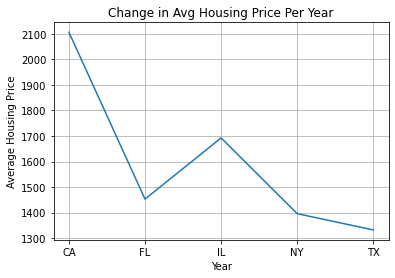

In [24]:
#create a line chart of the mean of the housing mean
# x-axis = RE_groupby_year.index.values, y-axis = RE_groupby_year["mean"] 
# the index values are the years, 2015, 2016 , etc. 
plt.plot(top5_rental_summary.index.values, top5_rental_summary["mean"])

# Add labels and title to graph
plt.xlabel("Year")
plt.ylabel("Average Housing Price")
plt.title("Change in Avg Housing Price Per Year")

# plt.xlim(-0.75, len(RE_groupby_year.index.values))
# plt.ylim(145000, max(RE_groupby_year["mean"])+50)

plt.grid()
plt.show()

# positive relationship
# increasing housing price from 2015 to 2020
# add x-lim and y- lim
